### Video Game Sales

Team 5 members:
- Ahmad Abusabaeen
- Fatema Buhuligah
- Saleh Alabbas

In [7]:
# Importing libraries
import pandas as pd
import math 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the dataset
vgs_raw = pd.read_csv('/Users/ahmad/Desktop/Video_games_sales/vgsales.csv')

### Exploring the data

In [68]:
# Show the first 5 rows in the dataest
vgs_raw.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Dictionary: 
- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.

In [10]:
# Show the number of rows and columns in the dataset
vgs_raw.shape

(16598, 11)

In [70]:
# Show summary of the dataset
vgs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [71]:
# Show statistics summary of the dataset
vgs_raw.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [72]:
# Show total number of unique values in Publisher column 
vgs_raw['Publisher'].nunique()

578

In [73]:
# Show total number of unique values in Platform column
vgs_raw['Platform'].nunique()

31

In [74]:
# Show unique values in Platform column
vgs_raw['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [75]:
# Show total number of unique values in Genre column
vgs_raw['Genre'].nunique()


12

In [76]:
# Show unique values in Genre column
vgs_raw['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [77]:
# Show total number of unique values in Year column
vgs_raw['Year'].nunique()

39

In [78]:
# Show unique values in Year column
vgs_raw['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [79]:
# Sort the unique values in Year column ascendingly
a = vgs_raw['Year'].unique()
print(sorted(a))

[1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, nan, 2016.0, 2017.0, 2020.0]


In [80]:
# Show all data for the years 2017 - 2020
vgs_raw[ vgs_raw.Year.isin([2017, 2018, 2019, 2020]) ]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


We don't have data for these two years 2018 & 2019. Whereas 2017 had only 3 games, and only one game for 2020.

#### Issues:
 
 
 * Set the Rank column as index.
 
 * Null values:
There are two columns that have null values (Year & Publisher).

 * Data type:
 The year column is a float type.


In [81]:
# Printing the total number of null values
vgs_raw.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Since the missing values in Year and Publisher columns represents less than 2% of the data, and with the shotage time we have, we decided to drop the rows with misssing values. 

#### Cleaning the data

In [11]:
# Making a copy of the orignal dataset 
vgs_clean = vgs_raw.copy()

In [12]:
# Set Rank column as index
vgs_clean = vgs_clean.set_index('Rank')
vgs_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [13]:
# Drop all rows that contain missing values 
vgs_clean.dropna(inplace = True)


In [14]:
# Checking the result of the above code
vgs_clean.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [15]:
# Convert the type of Year column from float to integer 
vgs_clean['Year'] = vgs_clean['Year'].astype(int)

In [16]:
# Checking the result of the above code
vgs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int64  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [17]:
# Store the clean dataset
vgs_clean.to_csv('cleaned_data.csv')

#### Analyzing Data

Question 1:

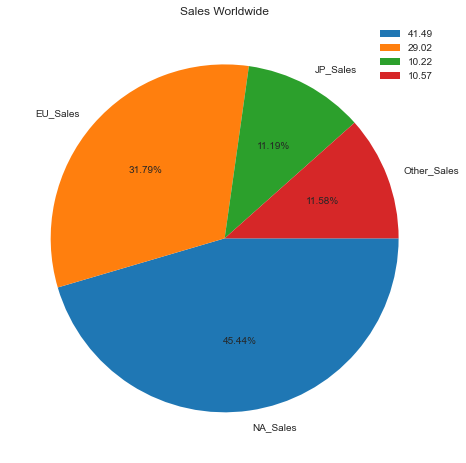

In [18]:
# 1- What region of the world do you think has the most sales? 41.49 NA_Sales in Wii Sports game
plt.style.use('seaborn-darkgrid')
x = vgs_clean[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].max()
labels = vgs_clean[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].max().index
labels1= ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
plt.figure(figsize = [10, 8])
plt.pie(x, labels = labels, counterclock= False, autopct= lambda p:f'{p:.2f}%')
plt.title('Sales Worldwide')
plt.legend(vgs_clean[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].max())
plt.show()

Question 2:

In [90]:
# What is the average sales for each Genre globally?
vgs_clean.groupby("Genre")["Global_Sales"].agg(["mean"])

,mean
Genre,
Action,0.529942
Adventure,0.184137
Fighting,0.531160
Misc,0.468488
Platform,0.947577
Puzzle,0.424930
Racing,0.593273
Role-Playing,0.628456
Shooter,0.800468


Question 2:

In [91]:
# What game has the highest sales for the last 10 years globally?
max_Sales_ByYear =vgs_clean.groupby("Year")["Global_Sales"].aggregate(["idxmax", "max"])
vgs_clean[["Year", "Name"]].loc[max_Sales_ByYear["idxmax"]].tail(9)

,Year,Name
Rank,,
16,2010,Kinect Adventures!
30,2011,Call of Duty: Modern Warfare 3
35,2012,Call of Duty: Black Ops II
17,2013,Grand Theft Auto V
45,2014,Grand Theft Auto V
34,2015,Call of Duty: Black Ops 3
222,2016,FIFA 17
14393,2017,Phantasy Star Online 2 Episode 4: Deluxe Package
5959,2020,Imagine: Makeup Artist


Question 3:

In [92]:
# Publishers total sales for each region
publishers_sales = vgs_clean.groupby("Publisher")[regions].agg(["sum"])

# max publishers sales by region.
publishers_sales.idxmax()

NA_Sales     sum           Nintendo
EU_Sales     sum           Nintendo
JP_Sales     sum           Nintendo
Other_Sales  sum    Electronic Arts
dtype: object

In [93]:
# intersted in some publishers?
intersting_Pub = ["Electronic Arts", "Activision", "Nintendo",
                 "Microsoft Game Studios", "Ubisoft", "Sony Computer Entertainment",
                 "Square Enix", "Take-Two Interactive","Capcom"]
publishers_sales.loc[intersting_Pub]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
,sum,sum,sum,sum
Publisher,,,,
Electronic Arts,584.22,367.38,13.98,127.63
Activision,426.01,213.72,6.54,74.79
Nintendo,815.75,418.30,454.99,95.19
Microsoft Game Studios,155.35,68.61,3.26,18.56
Ubisoft,252.81,163.03,7.33,50.16
Sony Computer Entertainment,265.22,187.55,74.10,80.40
Square Enix,48.59,32.57,49.79,13.84
Take-Two Interactive,220.47,117.95,5.83,55.20


Question 4:

In [94]:
# Which publisher released highest ranking games from 2010 to 2020?
vgs_clean[vgs_clean.Year.isin(range(2010,2021))].groupby("Publisher")[regions].agg(["sum"]).idxmax()


NA_Sales     sum         Activision
EU_Sales     sum    Electronic Arts
JP_Sales     sum           Nintendo
Other_Sales  sum    Electronic Arts
dtype: object

Question 5:

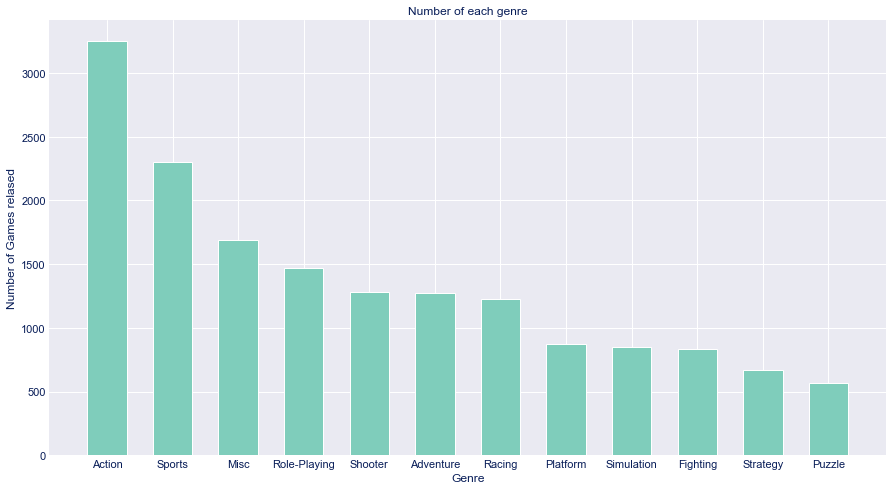

In [104]:
# What is the most common genre? 

x = vgs_clean['Genre'].value_counts().index
y = vgs_clean['Genre'].value_counts()

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
plt.xticks( color ='#081d58')
plt.yticks(color ='#081d58')
plt.bar(x, y, color= ('#7fcdbb'), width=0.6)
plt.title('Number of each genre', color ='#081d58')
plt.xlabel('Genre', color ='#081d58')
plt.ylabel('Number of Games relased', color ='#081d58');

### the code below answering the same question above

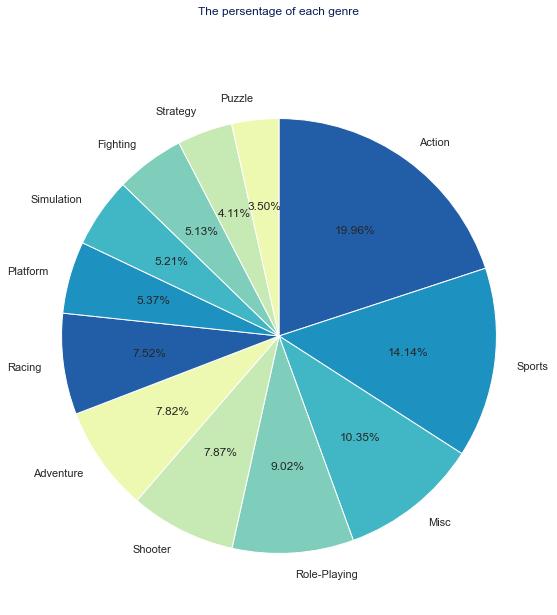

In [111]:
# What is the most common genre that has been released? 
plt.style.use('seaborn-darkgrid')
x1 = vgs_clean['Genre'].value_counts()
colors = ['#225ea8', '#1d91c0', '#41b6c4', '#7fcdbb', '#c7e9b4', '#edf8b1']
plt.figure(figsize = [15, 10])
plt.pie(x1, labels = x1.index , counterclock = False, colors= colors, startangle=90, autopct= lambda p:f'{p:.2f}%')
plt.title('The persentage of each genre', y=1.08, color ='#081d58');

Question 6:

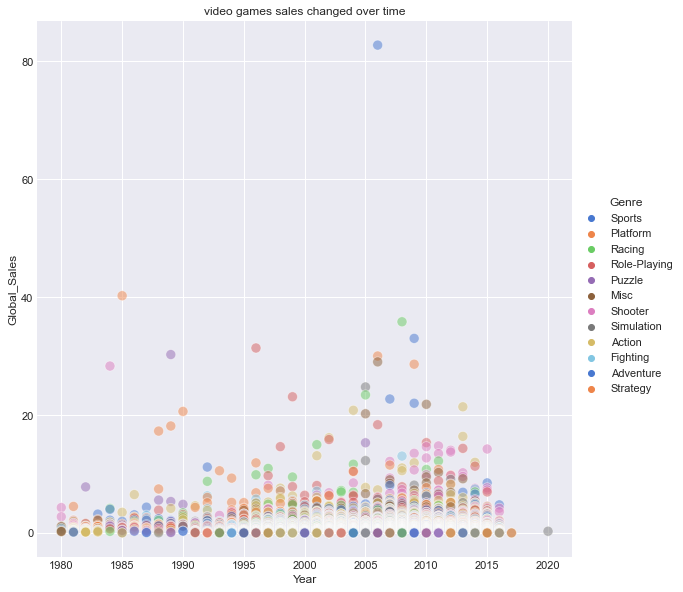

In [115]:
# How the video games sales changed over time
plt.style.use('seaborn-darkgrid')
ax = sns.relplot(x="Year", y="Global_Sales", hue = "Genre", sizes=(40, 400), alpha=.5, s=100, palette="muted", height=8, data = vgs_clean)
plt.title('video games sales changed over time');

Question 7:

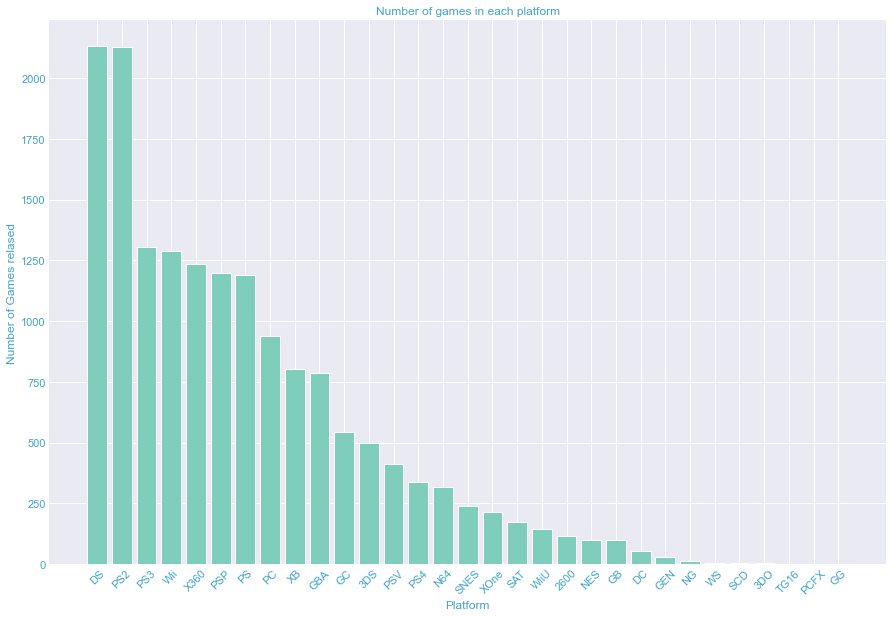

In [117]:
# Which Platform has the highest number of games?
plt.style.use('seaborn-darkgrid')
x = vgs_clean['Platform'].value_counts().index
y = vgs_clean['Platform'].value_counts()
plt.figure(figsize=(15,10))
plt.xticks(rotation=45 , color ='#43a2ca')
plt.yticks(color ='#43a2ca')
plt.bar(x, y, color= ('#7fcdbb'))

plt.title('Number of games in each platform', color ='#43a2ca')
plt.xlabel('Platform', color ='#43a2ca')
plt.ylabel('Number of Games relased', color ='#43a2ca');

 Question 8:

<BarContainer object of 39 artists>

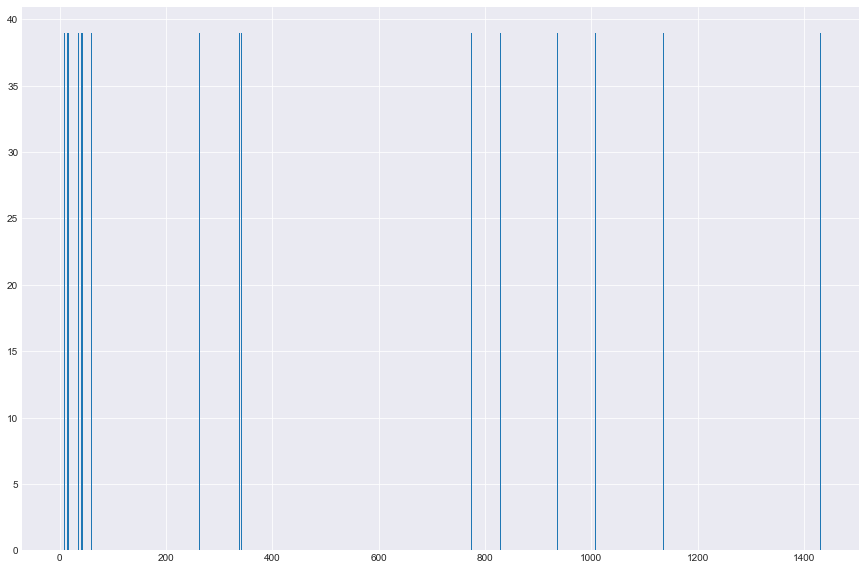

In [19]:
#What year has the most released games?
xs = vgs_clean.Year.value_counts()
ys = len(xs)

plt.figure(figsize=(15, 10))
plt.bar(xs, ys)

Question 9:

In [20]:
# Which publisher has prodcued the highest number of games?
vgs_clean.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

In [21]:
# To make sure
vgs_clean[ vgs_clean.Publisher.isin(['Electronic Arts'])]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
83,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
84,The Sims 3,PC,2009,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
93,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
100,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
...,...,...,...,...,...,...,...,...,...,...
16342,Command & Conquer Renegade,PC,2002,Shooter,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16387,Poker for Dummies,PC,2008,Misc,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16416,The Godfather (JP sales),X360,2006,Action,Electronic Arts,0.00,0.00,0.01,0.00,0.01
